# Text Emotion classifier with Tensorflow 2

> Author: [Manuel Romero](https://twitter.com/mrm8488)

> Dataset and idea from: [Elvis](https://twitter.com/omarsar0)

In [ ]:
!nvidia-smi

Thu Mar  2 01:57:55 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   58C    P0    29W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## Download GloVe word embeddings
We will use it to create the embedding layer so we will not have to train it in the model

In [ ]:
!wget http://nlp.stanford.edu/data/glove.6B.zip

--2023-03-02 01:57:55--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2023-03-02 01:57:55--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2023-03-02 01:57:56--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glov

In [ ]:
!unzip glove*.zip

Archive:  glove.6B.zip
  inflating: glove.6B.50d.txt        
  inflating: glove.6B.100d.txt       
  inflating: glove.6B.200d.txt       
  inflating: glove.6B.300d.txt       


In [ ]:
!rm -rf glove.6B.50d.txt
!rm -rf glove.6B.200d.txt
!rm -rf glove.6B.300d.txt

## Download the dataset

In [ ]:
!wget https://www.dropbox.com/s/607ptdakxuh5i4s/merged_training.pkl

--2023-03-02 02:01:01--  https://www.dropbox.com/s/607ptdakxuh5i4s/merged_training.pkl
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:6030:18::a27d:5012
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/607ptdakxuh5i4s/merged_training.pkl [following]
--2023-03-02 02:01:02--  https://www.dropbox.com/s/raw/607ptdakxuh5i4s/merged_training.pkl
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 404 Not Found
2023-03-02 02:01:02 ERROR 404: Not Found.



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('drive/MyDrive/Dataset/text_emotion.csv') 
df['sentiment'].value_counts()

worry        8459
happiness    6985
sadness      5164
love         3842
hate         1323
Name: sentiment, dtype: int64

In [ ]:
import pandas as pd
pkl = pd.read_pickle('/content/drive/MyDrive/Dataset/merged_training.pkl')

In [ ]:
import pickle

## helper function
def load_from_pickle(directory):
    return pickle.load(open(directory,"rb"))

In [ ]:
# data = load_from_pickle(directory="merged_training.pkl")
data = pkl.copy()

## using a sample
emotions = [ "sadness", "joy", "love", "anger", "fear", "surprise"]
data= data[data["emotions"].isin(emotions)]

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 416809 entries, 27383 to 64703
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   text      416809 non-null  object
 1   emotions  416809 non-null  object
dtypes: object(2)
memory usage: 9.5+ MB


In [ ]:
data.describe()

,text,emotions
count,416809,416809
unique,393822,6
top,i feel more adventurous willing to take risks,joy
freq,16,141067


In [ ]:
data.isna().sum()

text        0
emotions    0
dtype: int64

In [ ]:
data.isnull().sum()

text        0
emotions    0
dtype: int64

In [ ]:
data.head(20)

,text,emotions
27383,i feel awful about it too because it s my job ...,sadness
110083,im alone i feel awful,sadness
140764,ive probably mentioned this before but i reall...,joy
100071,i was feeling a little low few days back,sadness
2837,i beleive that i am much more sensitive to oth...,love
18231,i find myself frustrated with christians becau...,love
10714,i am one of those people who feels like going ...,joy
35177,i feel especially pleased about this as this h...,joy
122177,i was struggling with these awful feelings and...,joy
26723,i feel so enraged but helpless at the same time,anger


In [ ]:
# data[0]

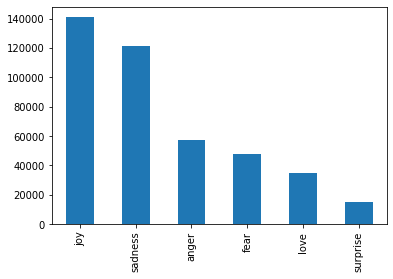

In [ ]:
data.emotions.value_counts().plot.bar()

In [ ]:
MAX_NB_WORDS = 100000    # max no. of words for tokenizer
MAX_SEQUENCE_LENGTH = 170 # max length of each entry (sentence), including padding
VALIDATION_SPLIT = 0.2   # data for validation (not used in training)
EMBEDDING_DIM = 100      # embedding dimensions for word vectors (word2vec/GloVe)

train = data

#labels = emotions
y = train['emotions'].values
comments_train = train['text']
comments_train = list(comments_train)

In [ ]:
y

array(['sadness', 'sadness', 'joy', ..., 'sadness', 'joy', 'sadness'],
      dtype=object)

In [ ]:
len(comments_train)

416809

In [ ]:
max_text = (max(comments_train, key=len))

In [ ]:
len(max_text.split())

178

In [ ]:
def num_words(sentence):
  words = sentence.split()
  return len(words)

In [ ]:
total_avg_words = sum( map(num_words, comments_train) ) / len(comments_train)
total_avg_words

19.211015117235952

In [ ]:
MAX_SEQUENCE_LENGTH = 50

## Text pre-proccessing

In [ ]:
import re
from tqdm import tqdm_notebook

import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
def clean_text(text, remove_stopwords = True):
    output = ""
    text = str(text).replace("\n", "")
    text = re.sub(r'[^\w\s]','',text).lower()
    if remove_stopwords:
        text = text.split(" ")
        for word in text:
            if word not in stopwords.words("english"):
                output = output + " " + word
    else:
        output = text
    return str(output.strip())[1:-3].replace("  ", " ")

In [ ]:
texts = [] 

for line in tqdm_notebook(comments_train, total=159571): 
    texts.append(clean_text(line))

<ipython-input-27-f1e11228aab2>:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for line in tqdm_notebook(comments_train, total=159571):


  0%|          | 0/159571 [00:00<?, ?it/s]

In [ ]:
len(texts)

416809

In [ ]:
print('Sample data:', texts[1], y[1])

Sample data: m alone feel aw sadness


## Tokenize the texts

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [ ]:
tokenizer = Tokenizer(num_words=MAX_NB_WORDS)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
word_index = tokenizer.word_index
print('Vocabulary size:', len(word_index))

Vocabulary size: 86474


In [ ]:
import json
with open('word_index.json', 'w') as f:
    json.dump(word_index, f)
with open('index_word.json', 'w') as f2:
    json.dump(tokenizer.index_word, f2)

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
data = pad_sequences(sequences, padding = 'post', maxlen = MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', y.shape)

Shape of data tensor: (416809, 50)
Shape of label tensor: (416809,)


In [ ]:
import numpy as np

indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = y[indices]

In [ ]:
data[25]

array([  319,  7169,     2,  1692, 18861,  2604,  1183,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0], dtype=int32)

In [ ]:
labels[25]

'joy'

## One-hot encoding labels

In [ ]:
from sklearn import preprocessing
lb = preprocessing.LabelBinarizer()
lb.fit(labels)

LabelBinarizer()

In [ ]:
lb.classes_

array(['anger', 'fear', 'joy', 'love', 'sadness', 'surprise'], dtype='<U8')

In [ ]:
labels = lb.transform(labels)

In [ ]:
labels[25]

array([0, 0, 1, 0, 0, 0])

In [ ]:
num_validation_samples = int(VALIDATION_SPLIT*data.shape[0])
x_train = data[: -num_validation_samples]
y_train = labels[: -num_validation_samples]
x_val = data[-num_validation_samples: ]
y_val = labels[-num_validation_samples: ]
print('Number of entries in each category:')
print('training: ', y_train.sum(axis=0))
print('validation: ', y_val.sum(axis=0))

Number of entries in each category:
training:  [ 45935  38267 112815  27622  96852  11957]
validation:  [11382  9445 28252  6932 24335  3015]


In [ ]:
x_train.shape

(333448, 50)

In [ ]:
y_train.shape

(333448, 6)

In [ ]:
x_val.shape

(83361, 50)

In [ ]:
y_val.shape

(83361, 6)

## Create test set

In [ ]:
x_val = x_val[: -40000]
y_val = y_val[: -40000]
x_test = x_val[-40000: ]
y_test = y_val[-40000: ]

In [ ]:
print('Tokenized sentences: \n', data[10])
print('One hot label: \n', labels[10])

Tokenized sentences: 
 [   5    3   18  571   24   75  524 1893   12 1470  667    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0]
One hot label: 
 [0 1 0 0 0 0]


## Create the embedding matrix for our model

In [ ]:
embeddings_index = {}
f = open('/content/glove.6B.100d.txt')
print('Loading GloVe from:', '/content/glove.6B.100d.txt','...', end='')
for line in f:
    values = line.split()
    word = values[0]
    embeddings_index[word] = np.asarray(values[1:], dtype='float32')
f.close()
print("Done.\n Proceeding with Embedding Matrix...", end="")

embedding_matrix = np.random.random((len(word_index) + 1, EMBEDDING_DIM))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector
print(" Completed!")

Loading GloVe from: /content/glove.6B.100d.txt ...Done.
 Proceeding with Embedding Matrix... Completed!


In [ ]:
embedding_matrix.shape

(86475, 100)

## Create the model (function API)

In [ ]:
from tensorflow.keras import regularizers, initializers, optimizers, callbacks
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model

In [ ]:
sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
embedding_layer = Embedding(len(word_index) + 1,
                           EMBEDDING_DIM,
                           weights = [embedding_matrix],
                           input_length = MAX_SEQUENCE_LENGTH,
                           trainable=False,
                           name = 'embeddings')
embedded_sequences = embedding_layer(sequence_input)
x = LSTM(60, return_sequences=True,name='lstm_layer')(embedded_sequences)
x = GlobalMaxPool1D()(x)
x = Dropout(0.1)(x)
x = Dense(50, activation="relu")(x)
x = Dropout(0.1)(x)
preds = Dense(6, activation="softmax")(x)

In [ ]:
model = Model(sequence_input, preds)
model.compile(loss = 'categorical_crossentropy',
             optimizer='adam',
             metrics = ['accuracy'])

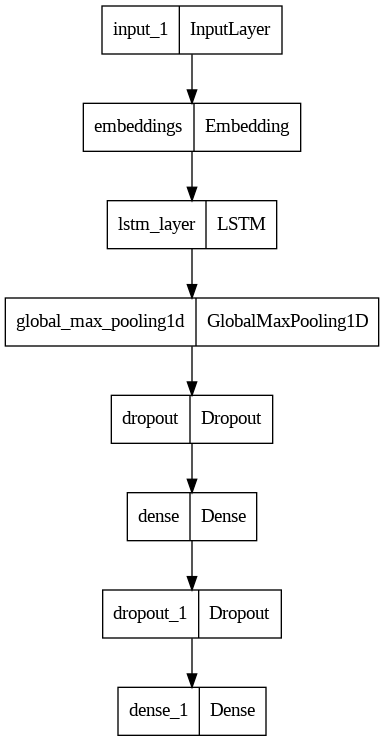

In [ ]:
import tensorflow as tf
tf.keras.utils.plot_model(model)

In [ ]:
print('Training progress:')
history = model.fit(x_train, y_train, epochs = 5, batch_size=128, validation_data=(x_val, y_val))

Training progress:
Epoch 1/5
2606/2606 [==============================] - 27s 7ms/step - loss: 0.6103 - accuracy: 0.7758 - val_loss: 0.2620 - val_accuracy: 0.8950
Epoch 2/5
2606/2606 [==============================] - 20s 8ms/step - loss: 0.2375 - accuracy: 0.9032 - val_loss: 0.1830 - val_accuracy: 0.9162
Epoch 3/5
2606/2606 [==============================] - 19s 7ms/step - loss: 0.1815 - accuracy: 0.9170 - val_loss: 0.1544 - val_accuracy: 0.9192
Epoch 4/5
2606/2606 [==============================] - 20s 8ms/step - loss: 0.1571 - accuracy: 0.9220 - val_loss: 0.1434 - val_accuracy: 0.9217
Epoch 5/5
2606/2606 [==============================] - 19s 7ms/step - loss: 0.1430 - accuracy: 0.9255 - val_loss: 0.1330 - val_accuracy: 0.9253


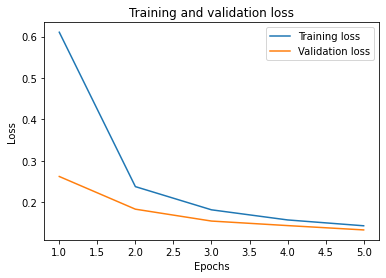

In [ ]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss)+1)
plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show();

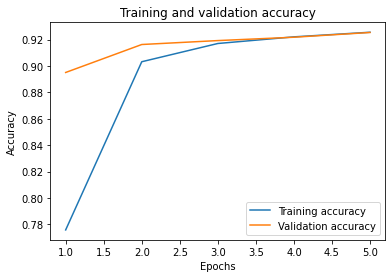

In [ ]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
plt.plot(epochs, accuracy, label='Training accuracy')
plt.plot(epochs, val_accuracy, label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.show();

In [ ]:
print("Accuracy in the test set:")
model.evaluate(x_test, y_test)[1]

Accuracy in the test set:
1250/1250 [==============================] - 6s 5ms/step - loss: 0.1329 - accuracy: 0.9258


0.925849974155426

## Test the model

In [ ]:
samples = ['i feel like, i do not know...', 'love you woman', 'that is so funny', 'mamma, i just killed a man', 'i want to ride my bicycle', 'im alone i feel awful', 'i beleive that i am much more sensitive to oth...']

In [ ]:
new = ["I have one, absolute, recurring frustration with academic scientists in every field I've worked with--physics, climate change, chemical contamination--you name it: ðŸ§µ", "@DaiberTerri @roadsidetweets Are you kidding she blames climate change on racism", "For our latest Debate, we asked @aldatweets and @sdschuyler whether or not we should start preparing to evacuate Miami? https://t.co/f6XaIGz9Lk Given climate change, Florida's leadership, and the power of real-estate interests, I don't think it's looking good for the city.", "@RishiSunak IRGC spreads terror all over the world. Recently it has been proven that IRGC is supporting Russia in the war against #Ukraine. Please consider taking some serious actions and declare them as #IRGCterrorists for the sake of safety of all of us."]

In [ ]:
cleaned_samples = []
for sentence in new:
  print(sentence)
  cleaned = clean_text(sentence)
  print(cleaned)
  cleaned_samples.append(cleaned)

I have one, absolute, recurring frustration with academic scientists in every field I've worked with--physics, climate change, chemical contamination--you name it: ðŸ§µ
ne absolute recurring frustration academic scientists every field ive worked withphysics climate change chemical contaminationyou name 
@DaiberTerri @roadsidetweets Are you kidding she blames climate change on racism
aiberterri roadsidetweets kidding blames climate change rac
For our latest Debate, we asked @aldatweets and @sdschuyler whether or not we should start preparing to evacuate Miami? https://t.co/f6XaIGz9Lk Given climate change, Florida's leadership, and the power of real-estate interests, I don't think it's looking good for the city.
atest debate asked aldatweets sdschuyler whether start preparing evacuate miami httpstcof6xaigz9lk given climate change floridas leadership power realestate interests dont think looking good c
@RishiSunak IRGC spreads terror all over the world. Recently it has been proven that IR

In [ ]:
tokenized_seq = tokenizer.texts_to_sequences(cleaned_samples)
padded_seq =  pad_sequences(tokenized_seq, padding = 'post', maxlen = MAX_SEQUENCE_LENGTH)

In [ ]:
int2label = {
    0: 'anger',
    1: 'fear',
    2: 'joy',
    3: 'love',
    4: 'sadness',
    5: 'surprise'
}

In [ ]:
predictions = model.predict(padded_seq)

1/1 [==============================] - 0s 22ms/step


In [ ]:
for i, prediction in enumerate(predictions):
  print(new[i] +" => " +int2label[(np.argmax(prediction))])

I have one, absolute, recurring frustration with academic scientists in every field I've worked with--physics, climate change, chemical contamination--you name it: ðŸ§µ => anger
@DaiberTerri @roadsidetweets Are you kidding she blames climate change on racism => anger
For our latest Debate, we asked @aldatweets and @sdschuyler whether or not we should start preparing to evacuate Miami? https://t.co/f6XaIGz9Lk Given climate change, Florida's leadership, and the power of real-estate interests, I don't think it's looking good for the city. => anger
@RishiSunak IRGC spreads terror all over the world. Recently it has been proven that IRGC is supporting Russia in the war against #Ukraine. Please consider taking some serious actions and declare them as #IRGCterrorists for the sake of safety of all of us. => joy


In [ ]:
model.save('model.h5')

In [ ]:
!pip install -q tensorflowjs

     |████████████████████████████████| 61kB 3.0MB/s 
     |████████████████████████████████| 92kB 6.8MB/s 
     |████████████████████████████████| 104.6MB 118kB/s 
     |████████████████████████████████| 256kB 54.3MB/s 
     |████████████████████████████████| 921kB 56.9MB/s 
     |████████████████████████████████| 3.9MB 59.0MB/s 
     |████████████████████████████████| 450kB 50.2MB/s 
ERROR: tensorflow 2.2.0rc3 has requirement gast==0.3.3, but you'll have gast 0.2.2 which is incompatible.
ERROR: tensorflow 2.2.0rc3 has requirement tensorboard<2.3.0,>=2.2.0, but you'll have tensorboard 2.1.1 which is incompatible.
ERROR: tensorflow 2.2.0rc3 has requirement tensorflow-estimator<2.3.0,>=2.2.0rc0, but you'll have tensorflow-estimator 2.1.0 which is incompatible.
ERROR: tensorflow-probability 0.10.0rc0 has requirement gast>=0.3.2, but you'll have gast 0.2.2 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.


## Convert the model to TFjs format, zip and download it

In [ ]:
!tensorflowjs_converter --input_format=keras /content/model.h5 /content/tfjs_model

In [ ]:
!zip -r tfjs_model /content/tfjs_model

  adding: content/tfjs_model/ (stored 0%)
  adding: content/tfjs_model/group1-shard7of9.bin (deflated 8%)
  adding: content/tfjs_model/group1-shard9of9.bin (deflated 8%)
  adding: content/tfjs_model/group1-shard4of9.bin (deflated 8%)
  adding: content/tfjs_model/model.json (deflated 76%)
  adding: content/tfjs_model/group1-shard2of9.bin (deflated 8%)
  adding: content/tfjs_model/group1-shard6of9.bin (deflated 8%)
  adding: content/tfjs_model/group1-shard5of9.bin (deflated 8%)
  adding: content/tfjs_model/group1-shard1of9.bin (deflated 8%)
  adding: content/tfjs_model/group1-shard3of9.bin (deflated 8%)
  adding: content/tfjs_model/group1-shard8of9.bin (deflated 8%)


In [ ]:
from google.colab import files
files.download('/content/tfjs_model.zip')